# Recovering time from the causal ordering of snapsnots in N-body simulations

Here we have a bunch of snapshots of a direct N-body simulation with no softening. Each snapshot contains the positions and velocities of 1000 particles. If we treat each snapshot as a variable, will find that snapshot k+1 is conditionally independent on snapshot k-1 given snapshot k?

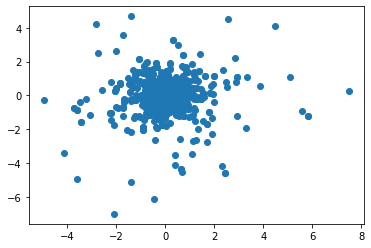

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.480879     0.000186    -0.009192     0.074055     0.064329   
std       0.931360     0.985833     0.982592     1.043192     6.779016   
min       0.080115    -4.946615    -6.998132    -5.813125   -87.647807   
25%       0.128222    -0.372746    -0.373838    -0.308649    -0.374689   
50%       0.228590     0.000580     0.039406     0.046076     0.031135   
75%       0.463026     0.394685     0.445488     0.452273     0.483443   
max      15.144778     7.471223     4.675029     8.221633   139.859574   

                5            6       7            8            9   \
count  1000.000000  1000.000000  1000.0  1000.000000  1000.000000   
mean     -0.249608     0.002143     0.0     0.037576   500.500000   
std      12.868808     5.847780     0.0     0.008410   288.819436   
min    -251.007973  -104.584993     0.0     0.031752     1.000000   
25%      -0.498321    -0.441984     0.0     0.031752   250.750000   
50%      -0.060842    -0.032472     0.0     0.035429   500.500000   
75%       0.401329     0.438008     0.0     0.039829   750.250000   
max     157.262117    89.640583     0.0     0.108869  1000.000000   

                 10            11           12           13           14  \
count  1.000000e+03  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean   1.241688e+18 -1.170280e+18     0.002833     0.028333    -0.016859   
std    2.042725e+18  1.929803e+18     0.000712     0.007121     0.991107   
min    0.000000e+00 -4.571268e+18     0.002552     0.025523    -7.821937   
25%    0.000000e+00 -4.057743e+18     0.002552     0.025523    -0.471892   
50%    0.000000e+00  0.000000e+00     0.002552     0.025523     0.020187   
75%    4.591064e+18  0.000000e+00     0.002783     0.027830     0.485825   
max    4.624715e+18  0.000000e+00     0.009468     0.094679     3.647738   

                15           16             17           18           19  
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000  
mean     -0.018383    -0.087074    -508.194538    -1.810669     3.321000  
std       1.021899     1.071009    5992.721469     0.690182     4.815927  
min     -10.578858    -7.256404 -132771.886591    -3.084011     1.000000  
25%      -0.485557    -0.605846      -3.054923    -2.350240     1.000000  
50%      -0.008054    -0.045427      -2.238935    -1.819741     1.000000  
75%       0.525745     0.356082      -1.547310    -1.325667     2.000000  
max       5.590030     9.491450      -0.222267    -0.222267    28.000000

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'virialized_0_25Myr/data.0000'

df = pd.read_csv(file_path, sep='\s+', header=None, skiprows=1)

plt.scatter(df[1], df[2]) #plotting X VS Y coordinates of stars
plt.show()

df.describe()

In [2]:
#Simulations are dimensionless but masses are reported in Solar masses,
#time in Myr and distances in parsecs. If we want more reasonable units we can
#make the crossing time 1, the total mass 1 and the size 1

#Calculating crossing time as std(X)/std(VX), assumes spherical symmetry
print(df[1].std()/df[4].std())

#Calculating the size
print(df[1].std())

#Calculating the total mass
print(df[0].sum())

0.14542414202185516
0.9858325876324637
480.87891081817503


#### Column 0 is the mass of each N-body particle, columns 1,2,3 the positions, columns 4,5,6 the velocities, other columns are garbage

In [3]:
import pandas as pd
import os

# The path to your directory containing the files
directory_path = './virialized_0_25Myr' #'./virialized/beginning_only'

# Placeholder for the final DataFrame columns
final_df_data = {}

# Columns to read from each file (zero-indexed)
positions = [1, 2, 3]
velocities = [4, 5, 6]

# Iterate over each file in the directory
for file_name in os.listdir(directory_path):
    # Construct full file path
    file_path = os.path.join(directory_path, file_name)
    # Check if it's a file and not a directory
    if os.path.isfile(file_path):
        # Read the specified columns from the file into a DataFrame, skip the first line
        df_pos = pd.read_csv(file_path, sep='\s+', header=None, skiprows=1, usecols=positions)
        df_vel = pd.read_csv(file_path, sep='\s+', header=None, skiprows=1, usecols=velocities)        
        # Flatten the DataFrame into a single column and convert it to a Series
        flattened_pos = pd.Series(df_pos.values.flatten())
        flattened_vel = pd.Series(df_vel.values.flatten())
        # Add the Series to the final DataFrame data, using the file name as the column name
        final_df_data["pos_" + file_name] = flattened_pos
        final_df_data["vel_" + file_name] = flattened_vel        

# Create the final DataFrame from the accumulated columns
final_df = pd.DataFrame(final_df_data)

# Displaying the first few rows of the final DataFrame to verify
print(final_df.shape)


(3000, 200)


Let's plot the x position (purple) and x velocity (yellow)  of a particle over time

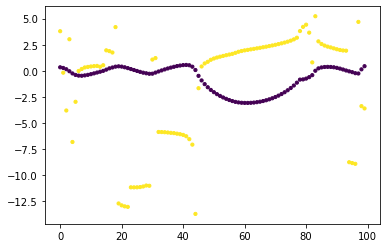

In [4]:
time = [x for x in range(int(final_df.shape[1]/2)) for _ in range(2)]
color = [i+1 for x in range(int(final_df.shape[1]/2)) for i in range(2)]
plt.scatter(time, final_df.iloc[0,:], s=10, c = color)
plt.show()

In [7]:
import networkx as nx
from causallearn.search.ConstraintBased.PC import pc
import pydot
from causallearn.utils.GraphUtils import GraphUtils

# Convert DataFrame to numpy array for compatibility with causal-learn
times = final_df.columns[0:20] #limiting to 20 times to speed up
data = final_df[times].to_numpy()

# Apply the PC algorithm to learn the DAG structure
graph = pc(data, alpha = 0.1)

# Convert the NetworkX graph to a PyDot graph
P = GraphUtils.to_pydot(graph.G, labels=times)

# Use PyDot to save the graph to a file (e.g., PNG)
P.write_png('causal_graph.png')

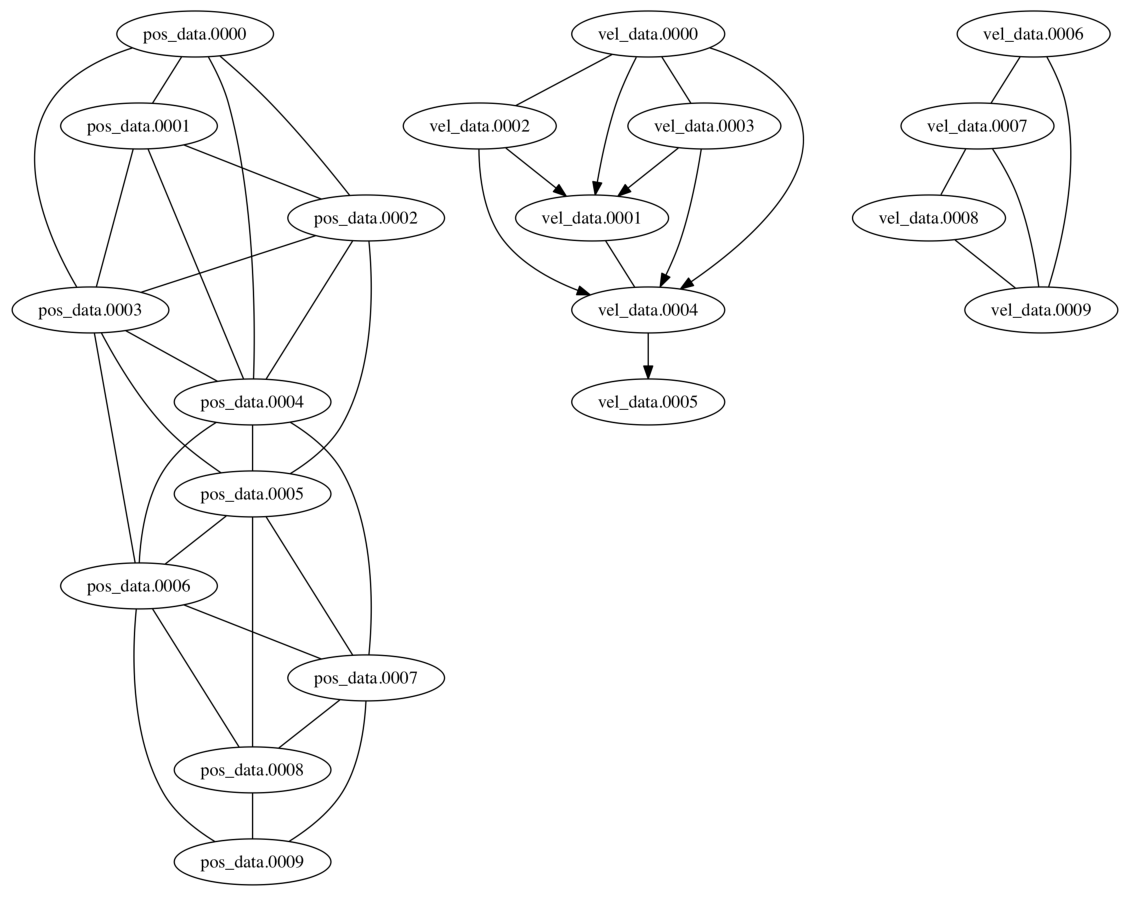

In [8]:
# To display the graph in Jupyter or similar environments, you can load and display the saved image
img = plt.imread('causal_graph.png')
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.axis('off')  # Do not show axes to keep it clean
plt.show()